# Pre-Class Assignment: Principal Component Analysis
# Day 21
# CMSE 202

## <p style="text-align: right;"> &#9989; Mohammed Alnuaimi</p>

## Goals for today's pre-class assignment 

1. Review of Python Modules
2. Matrices and their eigenvalues/eigenvectors
3. Example Application: The Iris data set

## Assignment instructions

**This assignment is due by 11:59 p.m. the day before class** and should be uploaded into the appropriate "Pre-class assignments" submission folder in the Desire2Learn website. 

----
## 1. Review of new (and old) Python modules
Run the following cell to import the modules we will be using in this pre-class assignment.

In [10]:
%matplotlib inline

import numpy as np
import scipy.linalg
import sklearn.decomposition as dec
import sklearn.datasets as ds
import matplotlib.pyplot as plt


&#9989; **Question**: Identify the 5 modules we've imported, and their function. (the first one is done for you and the last one should be pretty familiar to you)

 <font size=+3>&#9998;</font> Do This - Erase this first line of this cell and finish describing the remaining four modules. Use appropriate markdown to make your answer readable. (double-click on this text to edit this cell, and hit shift+enter to save the text)
 
1. **numpy** (imported as np): A platform for numerical and scientific computing in Python. It provides multi-dimensional arrays (e.g., those from linear algebra) and tools for working with them.
2. ... scipy is used to uilt using the optimized ATLAS LAPACK and BLAS libraries. It has very fast linear algebra capabilities
3. ...Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. 
4. ...Scikit-Learn provides clean datasets for you to use when building ML models. And when I say clean, I mean the type of clean that’s ready to be used to train a ML model.
5. ... Plotting package

---

## 2. Developing some intuition about principal component analysis

The following videos (developed at Georgia Tech) are to help you gain an understanding and intuition about principal component analysis (PCA). PCA is one of the main techniques used in data science, exploratory data analysis and modeling.

You can watch the entire course here:

https://youtu.be/Ki2iHgKxRBo?list=PLAwxTw4SYaPl0N6-e1GvyLp5-MUMUjOKo

It's a great video series but we don't have time to cover it all.

&#9989; **Do This:** Watch the following video for an overview of PCA (don't worry about any references to "readings" from their course).

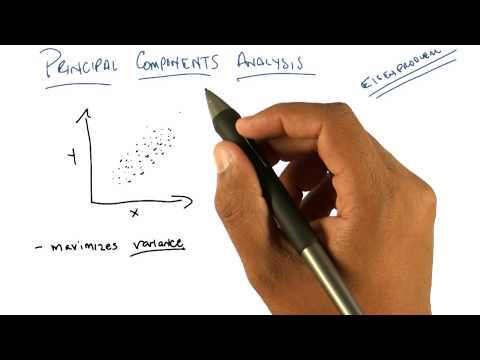

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("kw9R0nD69OU",width=640,height=360)

&#9989; **Question**: PCA is trying to find the directions with maximal what? 

<font size=+3>&#9998;</font> variance of data

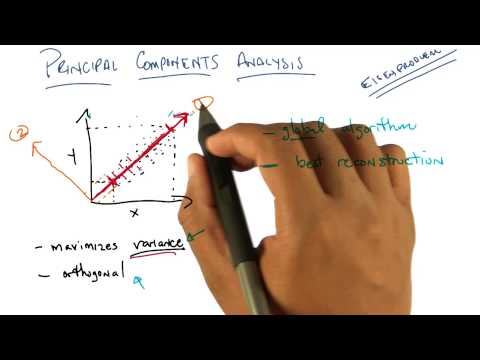

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("_nZUhV-qhZA",width=640,height=360)

&#9989; **Question**: This video introduces a concept of "features" in a dataset. What are the names of the two original features represented in the graph shown in this video? What parts of the graph would represent the new features after the PCA is performed? 

<font size=+3>&#9998;</font> 1,2. By the axis, we see how far along it is 

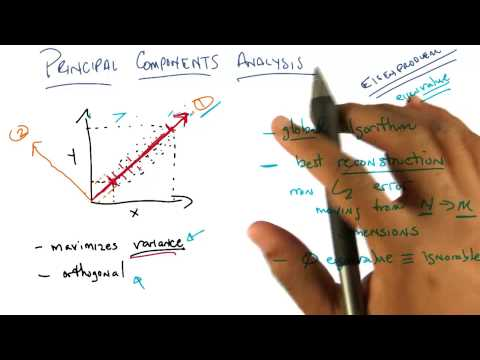

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo("kuzJJgPBrqc",width=640,height=360)

&#9989; **Question**: What does it mean if eigenvalue of a dimension is zero? How might performing PCA allow one to reduce the number of features we need to model to our data to get accurate results when making predictions?

<font size=+3>&#9998;</font> that means it provides no info. we see the eigen values if they are zero then bye-bye

---

## 3. Example Application: The Iris data set

Let's go back to the Iris dataset (the dataset that just keeps on giving!), but this time let's just load it using `sklearn`

In [12]:
# Load the dataset from sklearn and inspect it a bit
iris = ds.load_iris()
data = iris.data
target = iris.target
print(data.shape)
print(target)

(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Remember some of the details about the Iris data set. The three classes in the Iris dataset are represented by numbers in the 'target' vector:

1. Iris-setosa (n=50)
2. Iris-versicolor (n=50)
3. Iris-virginica (n=50)

There are four measurements (features) for each flower in the  'data' matrix: 

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
    
Example image for what these features correspond to on an actual iris:

<img src="http://nbviewer.jupyter.org/github/rasbt/pattern_classification/blob/master/Images/iris_petal_sepal.png" alt="Image of flower" width=400px>

#### Our Goal:

Create a model that given the four measurements can predicts the iris class.  We will use PCA to find axes that make it easier to separate the data into classes.  

### Step A: Try to visualize the features by plotting them.

&#9989; **Question**: Modify the following code to draw a scatterplot of the data for just the first and second axes of the data matrix (index 0 and 1).  Hint: use a similar vector notation as Step C below.

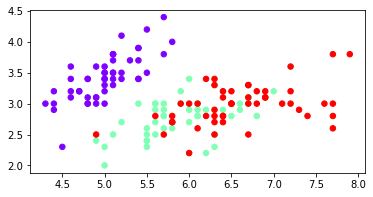

In [11]:
# DO THIS: Modify the code below to do a scatter plot with respect to the first two variables of the data
# i.e. all rows but just the first and second columns.
plt.figure(figsize=(6,3));
plt.scatter( data[:,0],data[:,1]   , c=target, s=30, cmap=plt.cm.rainbow);


If done correctly the above should show different color dots for each of the different iris types.  As you can see, the classes do not separate clearly as two of the classes have a significant amount of overlap. Perhaps there are two new directions (axes) that separate the data better?

### Step B: Transform the data in terms of its principal components
Now we will use a PCA algorithm. Fortunately there is a simple PCA function available in the sklearn module. 

In [7]:
pca = dec.PCA()
pca_data = pca.fit_transform(data)

Out of curiosity, let's print the eigenvalues.  Remember from the video that low eigenvalues indicate less information. Big eigenvalues indicate more information.

In [8]:
print(pca.explained_variance_)

[4.22824171 0.24267075 0.0782095  0.02383509]


### Step C: Now plot the transformed data in terms of its first two principal components

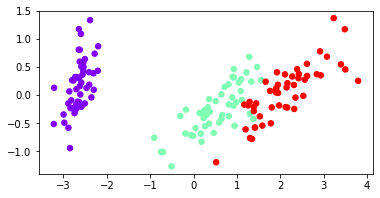

In [9]:
plt.figure(figsize=(6,3));
plt.scatter(pca_data[:,0], pca_data[:,1], c=target, s=30, cmap=plt.cm.rainbow);

&#9989; **Question:**  Describe in words the differences between the graphs from Step A and Step C.  They are representing the same data.  Why would we prefer to use the features produced by Step C?

<font size=+3>&#9998;</font> they are close to linear sepreation 

---
## 4. Preparing for a project update!

Now that you've been assigned your project group and hopefully had a meeting or two at this point, we want to check in and see how your group is doing on making some forward progress on your project.

**You should find a time to meet with your group either in person or on Zoom or have a conversation via Slack such that you can prepare to give a project update**.

As a group, you will give a project update to the rest of the class **during the "Day 22" class period**. For the project update, be prepared to:

1. Give a **4-minute** presentation to the rest of class. (Make sure someone in your group will be able to connect to an HDMI cable to present!)
2. Present a **short** set of slides (Google Slides is probably the easiest option for collaboration) that highlight the following:
    * Your assigned project topic and any modifications or new directions you've gone in since being assigned the project.
    * A **brief** bit of background about the topic.
    * The question(s) you hope to answer as part of the your project.
    * The datasets you've found or models you plan to use to answer your questions.
    * The Python tools you are using or plan to use.
    * Any details on additional project you've made on the project thus far.
3. Create an opportunity for everyone in your group to say something.
4. **Stop at 4 minutes**. We want to make sure every group has time to present, so pay attention to time.

Your final project will be due before the last class period and you will present on the last day of class. **You may wish to review the project grading rubric and requirements available [here](https://msu-cmse-courses.github.io/cmse202-S22-jb/course_materials/CMSE202_FinalProjectRequirementsAndGradingRubric.html) on the course website.**

---
## Follow-up Questions

Copy and paste the following questions into the appropriate box in the assignment survey include below and answer them there. (Note: You'll have to fill out the assignment number and go to the "NEXT" section of the survey to paste in these questions.)

1. When doing a principle component analysis (PCA), the goal is to find a new set of axes that maximize what?

2. When you perform PCA, what do large eigenvalues indicate versus small eigenvalues?

3. Do you have any questions or concerns about your semester project at this time?

----
# Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [13]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse202-pc-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---------
### Congratulations, you're done with your pre-class assignment!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's submission folder (Don't forget to add your name in the first cell).

&#169; Copyright 2021 Department of Computational Mathematics, Science and Engineering at Michigan State University